In [1]:
#importing libraries

from matplotlib import pyplot as plt
from matplotlib import style as st
import seaborn as sns
import numpy as np
import pandas as pd
import string
import warnings
%matplotlib notebook


In [2]:
#importing the dataset and copying it

train = pd.read_csv('C:/Users/Kailash Patel/Analysis_Project/Analysis Project/Datasets/train_ctrUa4K.csv')
test = pd.read_csv('C:/Users/Kailash Patel/Analysis_Project/Analysis Project/Datasets/test_lAUu6dG.csv')

train.head()
test.head()

train_dup = train.copy()
test_dup = test.copy()

In [6]:
#understanding the data
test.shape

(367, 12)

# Various techniques for univariate analysis

In [7]:
#performing the single variable analysis

train['Loan_Status'].value_counts()
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

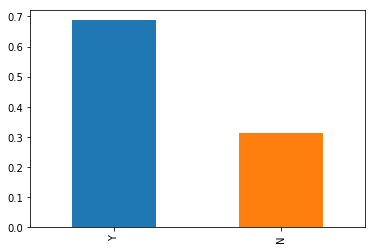

In [8]:
#plotting the graph of the above result

train['Loan_Status'].value_counts(normalize=True).plot.bar()

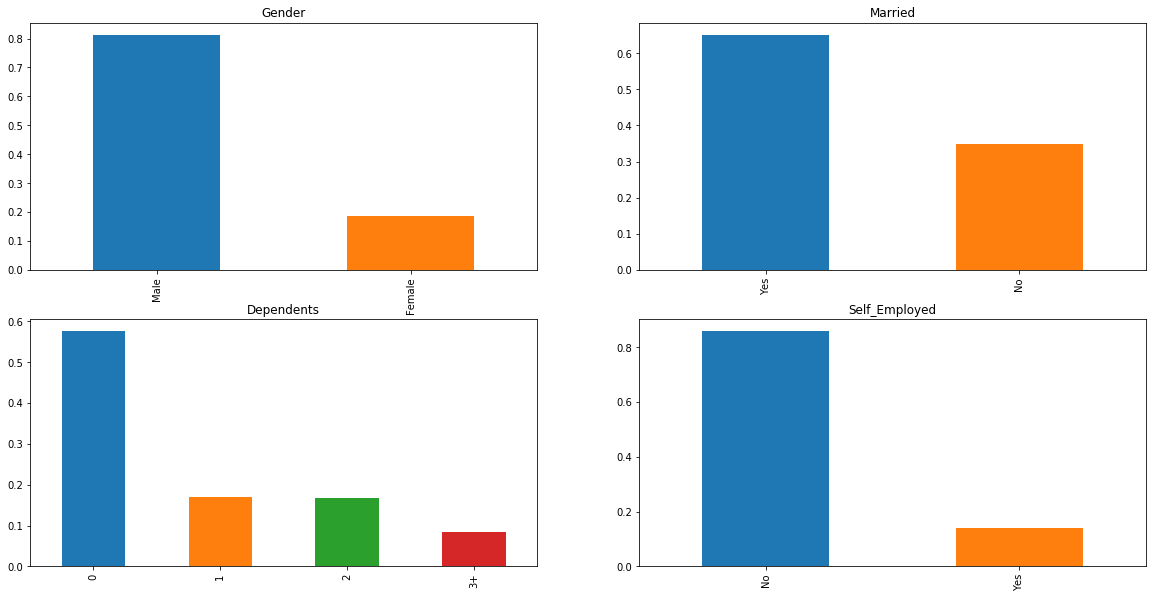

In [9]:
#plotting various graph for categorical variable and loan status
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Dependents')
plt.subplot(224) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self_Employed')
plt.show()

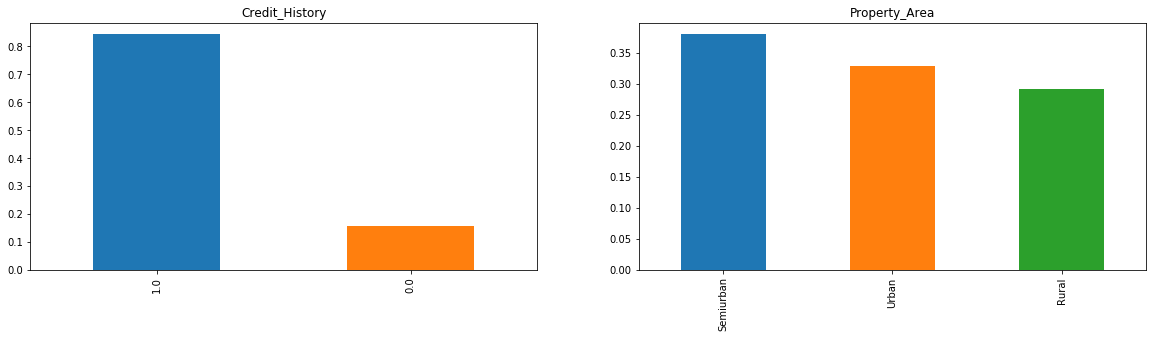

In [10]:
plt.figure(1)
plt.subplot(221) 
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit_History')
plt.subplot(222) 
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Property_Area')
plt.show()

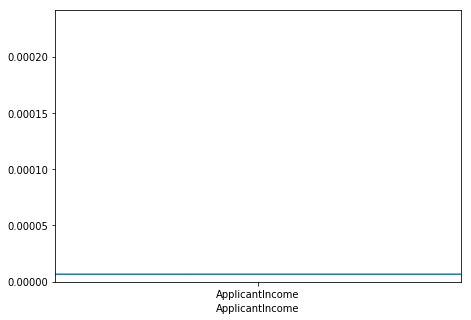

In [11]:
#Displaying the graph of independent numerical variables

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5,0.98,'')

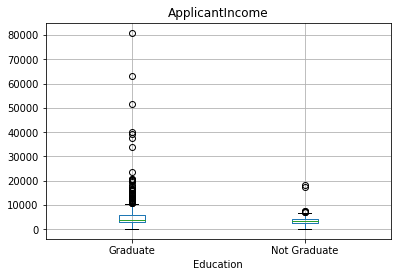

In [12]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

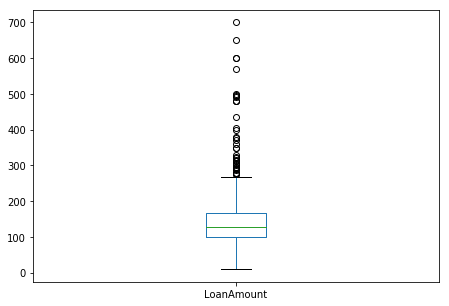

In [13]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
#sns.distplot(df, color='b')
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Multivariate Analysis using independent variable and target Variable

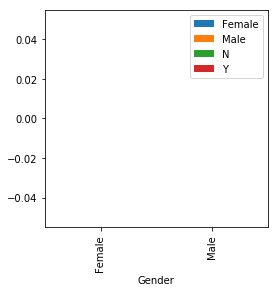

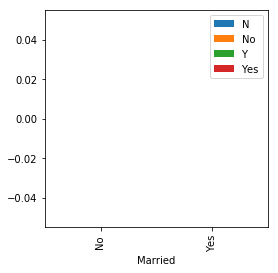

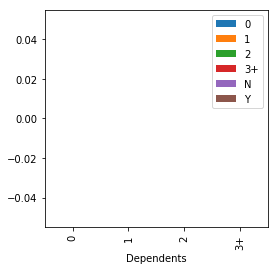

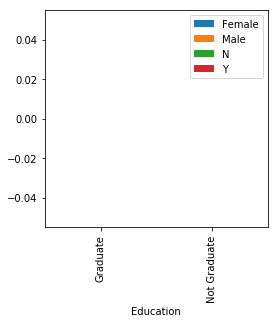

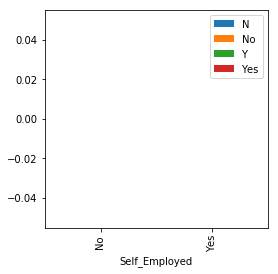

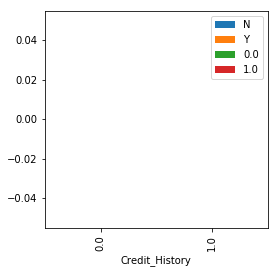

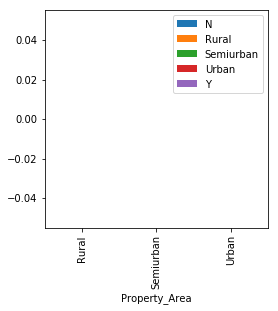

In [14]:
#plotting graph of what proportion of loan got approved for the male and female
gender=pd.crosstab(train['Gender'], train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(gender.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

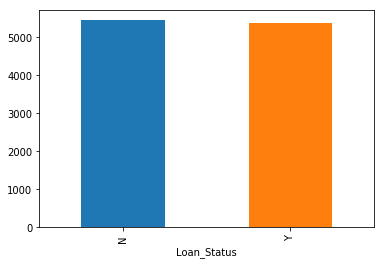

In [15]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## Binning

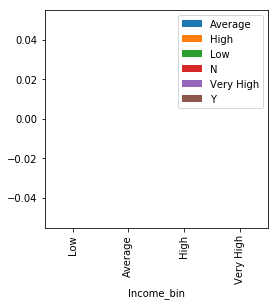

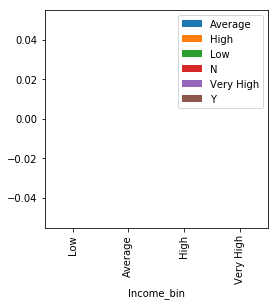

In [16]:
#we are categorizing the numerical data into different bins
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
test['Income_bin']=pd.cut(test['ApplicantIncome'],bins,labels=group)
#Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

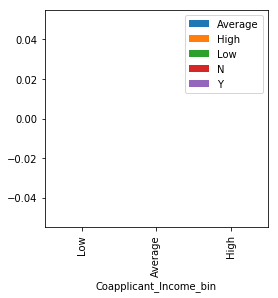

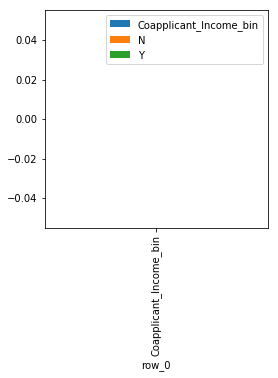

In [17]:
bins = [0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

bins = [0,1000,3000,42000]
group=['Low','Average','High']
test['Coapplicant_Income_bin']=pd.cut(test['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [18]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

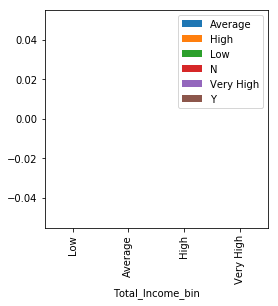

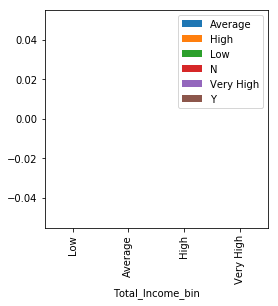

In [19]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
test['Total_Income_bin']=pd.cut(test['Total_Income'],bins,labels=group)
#Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

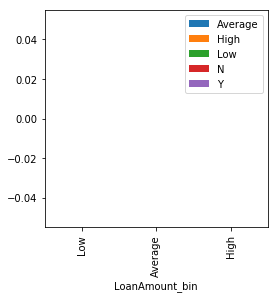

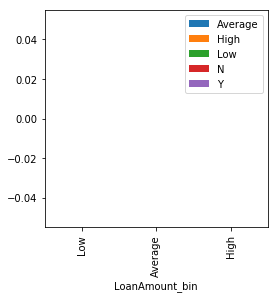

In [20]:
bins = [0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

bins = [0,100,200,700]
group=['Low','Average','High']
test['LoanAmount_bin']=pd.cut(test['LoanAmount'],bins,labels=group)
#LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=1).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [21]:
train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Coapplicant_Income_bin'], axis=1)
test.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Coapplicant_Income_bin'], axis=1)
train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

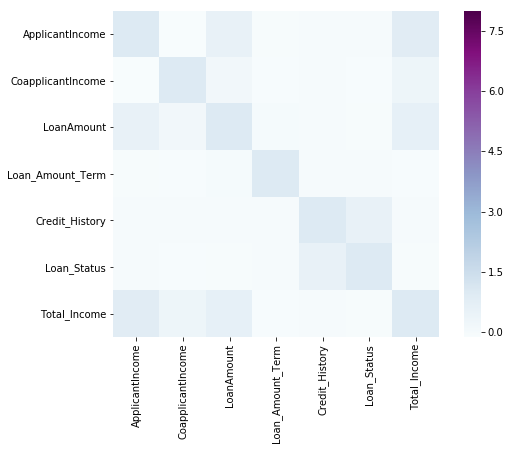

In [22]:
matrix=train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=8, square=True, cmap='BuPu')

# Missing Values and Outlier Treatment

In [23]:
test.isnull().sum()

Loan_ID                     0
Gender                     11
Married                     0
Dependents                 10
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bin                  2
Coapplicant_Income_bin    156
Total_Income                0
Total_Income_bin            0
LoanAmount_bin              5
dtype: int64

In [24]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [25]:
#filling the missing values for categorical variable with mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [26]:
#Loan Amount term is too a categorical variable
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [27]:
#filling the missing values for quantitative variable with mean or median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [28]:
#Above missing value imputation was for train dataset, now will do it for test dataset too

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

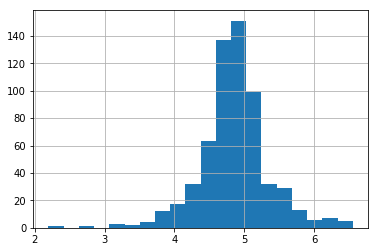

In [29]:
#Treating the outlier
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

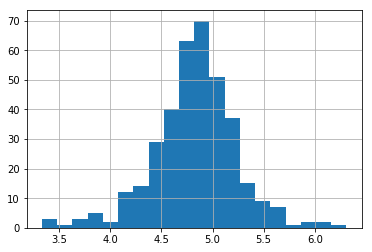

In [30]:
#similar steps for test dataset for outlier detection

test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Model building - Part 1

In [31]:
train.drop(['Loan_ID'],axis=1)
test.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,NaN,5720,High,Average,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Average,4576,High,Average,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Average,6800,Very High,High,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Low,Average,4886,High,Low,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,NaN,3276,Average,Low,4.356709
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Low,High,5587,High,Average,5.023881
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Low,NaN,2226,Low,Low,4.077537
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,Average,NaN,3881,Average,Average,4.990433
8,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,Very High,NaN,13633,Very High,High,5.634790
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Low,Average,4800,High,Average,4.812184


In [32]:
#Dropping the taget variable andd save it in another dataset
X=train.drop('Loan_Status', 1)
y=train.Loan_Status

In [33]:
#Getting the dummy values for the categorical dataset
#X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [35]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_log,Loan_ID_LP001002,Loan_ID_LP001003,...,Coapplicant_Income_bin_Low,Coapplicant_Income_bin_Average,Coapplicant_Income_bin_High,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very High,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,5849,0.0,128.0,360.0,1.0,1,5849.0,4.852030,1,0,...,0,0,0,0,0,1,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,4.852030,0,1,...,0,1,0,0,0,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,1,3000.0,4.189655,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,4.787492,0,0,...,0,1,0,0,0,1,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,6000.0,4.948760,0,0,...,0,0,0,0,0,1,0,0,1,0
5,5417,4196.0,267.0,360.0,1.0,1,9613.0,5.587249,0,0,...,0,0,1,0,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,1,3849.0,4.553877,0,0,...,0,1,0,0,1,0,0,1,0,0
7,3036,2504.0,158.0,360.0,0.0,0,5540.0,5.062595,0,0,...,0,1,0,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,5532.0,5.123964,0,0,...,0,1,0,0,0,1,0,0,1,0
9,12841,10968.0,349.0,360.0,1.0,0,23809.0,5.855072,0,0,...,0,0,1,0,0,0,1,0,0,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Low'

In [28]:
#lets predict the accuracy score
pred_cv = model.predict(X_cv)
accuracy_score(y_cv, pred_cv)

0.8699186991869918

In [29]:
pred_test=model.predict(test)
submission=pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_dup['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, solumns=['Loan_ID', 'Loan_Status']).to_csv('logistics.csv')

ValueError: X has 403 features per sample; expecting 650

# Stratified K Fold Logistic Regression

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
i=1
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("Accuracy score: ", score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score:  0.8064516129032258


ValueError: X has 388 features per sample; expecting 639

In [35]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Coapplicant_Income_bin_Low,Coapplicant_Income_bin_Average,Coapplicant_Income_bin_High,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very High,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,5849,0.0,128.0,360.0,1.0,5849.0,4.852030,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,6091.0,4.852030,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,3000.0,4.189655,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,2583,2358.0,120.0,360.0,1.0,4941.0,4.787492,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,6000.0,4.948760,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,5417,4196.0,267.0,360.0,1.0,9613.0,5.587249,0,0,0,...,0,0,1,0,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,3849.0,4.553877,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7,3036,2504.0,158.0,360.0,0.0,5540.0,5.062595,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,5532.0,5.123964,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,12841,10968.0,349.0,360.0,1.0,23809.0,5.855072,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [15]:
train.columns
train=train.drop(['Income_bins'], axis=1)